<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Delhivery%20-%20Feature%20Engineering%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

* The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors

# **Business Problem**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

# **Desired Outcome of Analysis**

* Basic data cleaning and exploration:
** Handle missing values in the data.
** Analyze the structure of the data.
** Try merging the rows using the hint mentioned above.
* Build some features to prepare the data for actual analysis. Extract features from the below fields:
** Destination Name: Split and extract features out of destination. City-place-code (State)
** Source Name: Split and extract features out of destination. City-place-code (State)
** Trip_creation_time: Extract features like month, year and day etc
* In-depth analysis and feature engineering
** Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
** Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.
** Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis
** Handle the outliers using the IQR method.
** Do one-hot encoding of categorical variables (like route_type)
Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler






# **Loading Modules and Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from scipy.stats import norm, binom, geom

#from scipy.stats import ttest_1samp, ttest_ind,ttest_rel

#from scipy.stats import chisquare,chi2,chi2_contingency

#from scipy.stats import f_oneway,kruskal,shapiro,levene
#from statsmodels.graphics.gofplots import qqplot

#from scipy.stats import pearsonr,spearmanr

#from scipy.stats import poisson,expon
#!pip install category_encoders
#from category_encoders import TargetEncoder
#!pip install sklearn
#from sklearn.preprocessing import LabelEncoder

In [11]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv")

# **Basic Metric Analysis & Data type Coversion**

In [4]:
data.shape

(144867, 24)

In [9]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,86.0,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=144867, step=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Lets Drop the unknown Fields
* is_cutoff – Unknown field,
* cutoff_factor – Unknown field,
* cutoff_timestamp – Unknown field
* factor – Unknown field
* segment_factor – Unknown field


In [12]:
data.drop(columns = ["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis = 1,inplace= True)

In [13]:
data.shape

(144867, 19)

In [ ]:
data.rename({"count":"total_count"},axis=1,inplace= True)
data.rename({"atemp":"feeling_temp"},axis=1,inplace= True)

In [ ]:
data.info()

Lets convert possible Column to "Cateory" datatype
* route_type – Transportation type
* data - tells whether the data is testing or training data

In [15]:
data["route_type"]=data["route_type"].astype("category")

In [16]:
data["data"]=data["data"].astype("category")

Lets Convert Datetime Columns as datatime64[ns]
* trip_creation_time – Timestamp of trip creation
* od_start_time – Trip start time
* od_end_time – Trip end time

In [17]:
data["trip_creation_time"]=data["trip_creation_time"].astype("datetime64")
data["od_start_time"]=data["od_start_time"].astype("datetime64")
data["od_end_time"]=data["od_end_time"].astype("datetime64")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
data.dtypes

* season, weather, holiday, workingday columns : dtype have been changed to "category"
* datatime column : Dtype changed to datetime64[ns]

In [ ]:
# Checking count of Unique values of Each Column
data.nunique()

In [ ]:
data.describe()

* Dataset is collected between 1st Jan 2011 to  19th Dec 2012
* Dataset has recording collected in all 4 Seasons & Weathers
* Data set has recording collectd in Workingdays & Holidays
* Temperature's range from 0.82 ~ 41.0
* But Tempeture felt ranged between 0.76 ~ 45.45
* Humidity range from 0 ~ 100 & Wind speed from 0 ~ 56.99
* Casual Booking minimmum is "0" & Maximum are 367 per day
* Registered Booking minimum is 0  & Maximum are 886 per day
* Overall Total Booking Count ranged from 1 ~ 977 per day
* from Mean - Median analysis of Casual, Registered & Total booking count : We can say definitely some Unusual bookings observed some days[Outliers]

# **Data Cleaning - Duplicates,Null Values & Outliers**

## Duplicates

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace= True)

No Duplicates Rows Found

## Null Values

In [ ]:
data.isna().sum(axis=0)

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp            0
feeling_temp    0
humidity        0
windspeed       0
casual          0
registered      0
total_count     0
dtype: int64

No "NAN" found in Data

## Outliers - Visualization using Box Plot & Numerically using IQR

* Outliers can be found in Casual, registered & total_count Columns
* We will visualize the outliers using boxplot
* we will get all possible parameters of a box plot using User defined function --> "boxplotallparameter(x)"

In [ ]:
# Userdefined function to get all statistical parameter of univariate boxplot including upper & lower limit values of a given series
# "x" --> Any Numerical Series
def boxplotallparameter(x):
  IQR = np.percentile(x,75) - np.percentile(x,25)
  lower_limit = max (np.percentile(x,25) - 1.5*IQR,0)
  upper_limit = np.percentile(x,75) + 1.5*IQR
  print("Minimum:",min(x))
  print("Lower_Limit:",lower_limit)
  print("Quantile25:",np.percentile(x,25))
  print("Median:",np.percentile(x,50))
  print("Quantile75:",np.percentile(x,75))
  print("Upper_Limit:",upper_limit)
  print("Maximum:",max(x))

### casual

<Axes: ylabel='casual'>

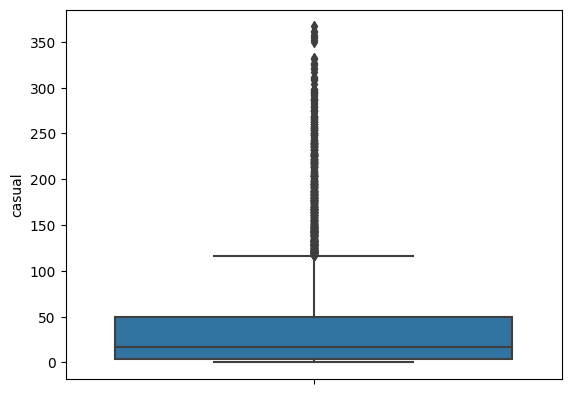

In [ ]:
sns.boxplot(data= data, y= "casual")

In [ ]:
boxplotallparameter(data["casual"])

Minimum: 0
Lower_Limit: 0
Quantile25: 4.0
Median: 17.0
Quantile75: 49.0
Upper_Limit: 116.5
Maximum: 367


* casual user per day range between 0 to 116, however there are some unsual booking some days ranging from 117 to 367 per day


### registered

<Axes: ylabel='registered'>

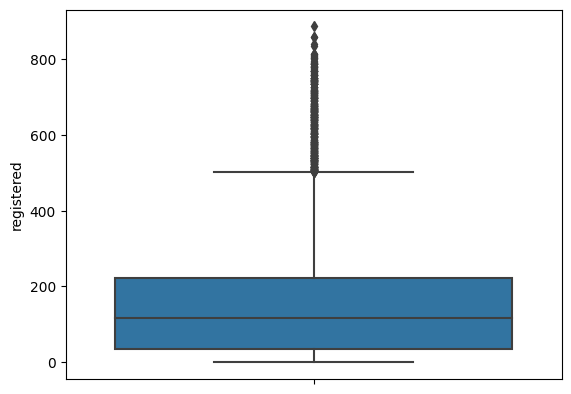

In [ ]:
sns.boxplot(data= data, y= 'registered')

In [ ]:
boxplotallparameter(data['registered'])

Minimum: 0
Lower_Limit: 0
Quantile25: 36.0
Median: 118.0
Quantile75: 222.0
Upper_Limit: 501.0
Maximum: 886


* registered user per day range between 0 to 501, however there are some unsual booking some days ranging from 502 to 886 per day

### total_count

<Axes: ylabel='total_count'>

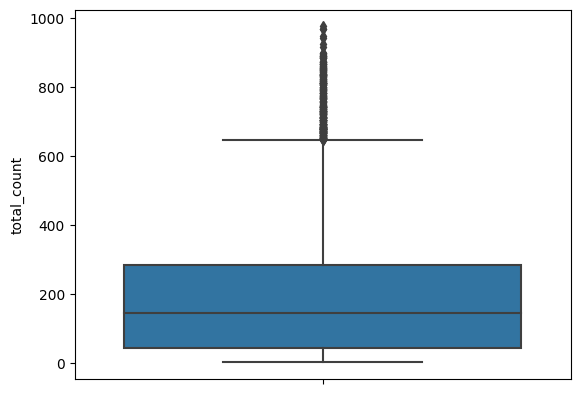

In [ ]:
sns.boxplot(data= data,y= "total_count")

In [ ]:
boxplotallparameter(data["total_count"])

Minimum: 1
Lower_Limit: 0
Quantile25: 42.0
Median: 145.0
Quantile75: 284.0
Upper_Limit: 647.0
Maximum: 977


* total_count of user per day range between 0 to 647, however there are some unsual booking some days ranging from 648 to 977 per day

# **Correlation among Data**

In [ ]:
data.corr()

<ipython-input-26-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,temp,feeling_temp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
feeling_temp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
total_count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<ipython-input-27-48d00ee6b6e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap = "Greens")


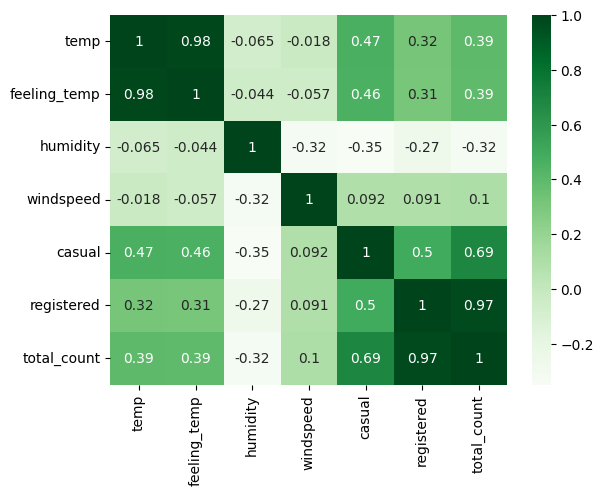

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

* temp & Humidity have some correlation with User Counts

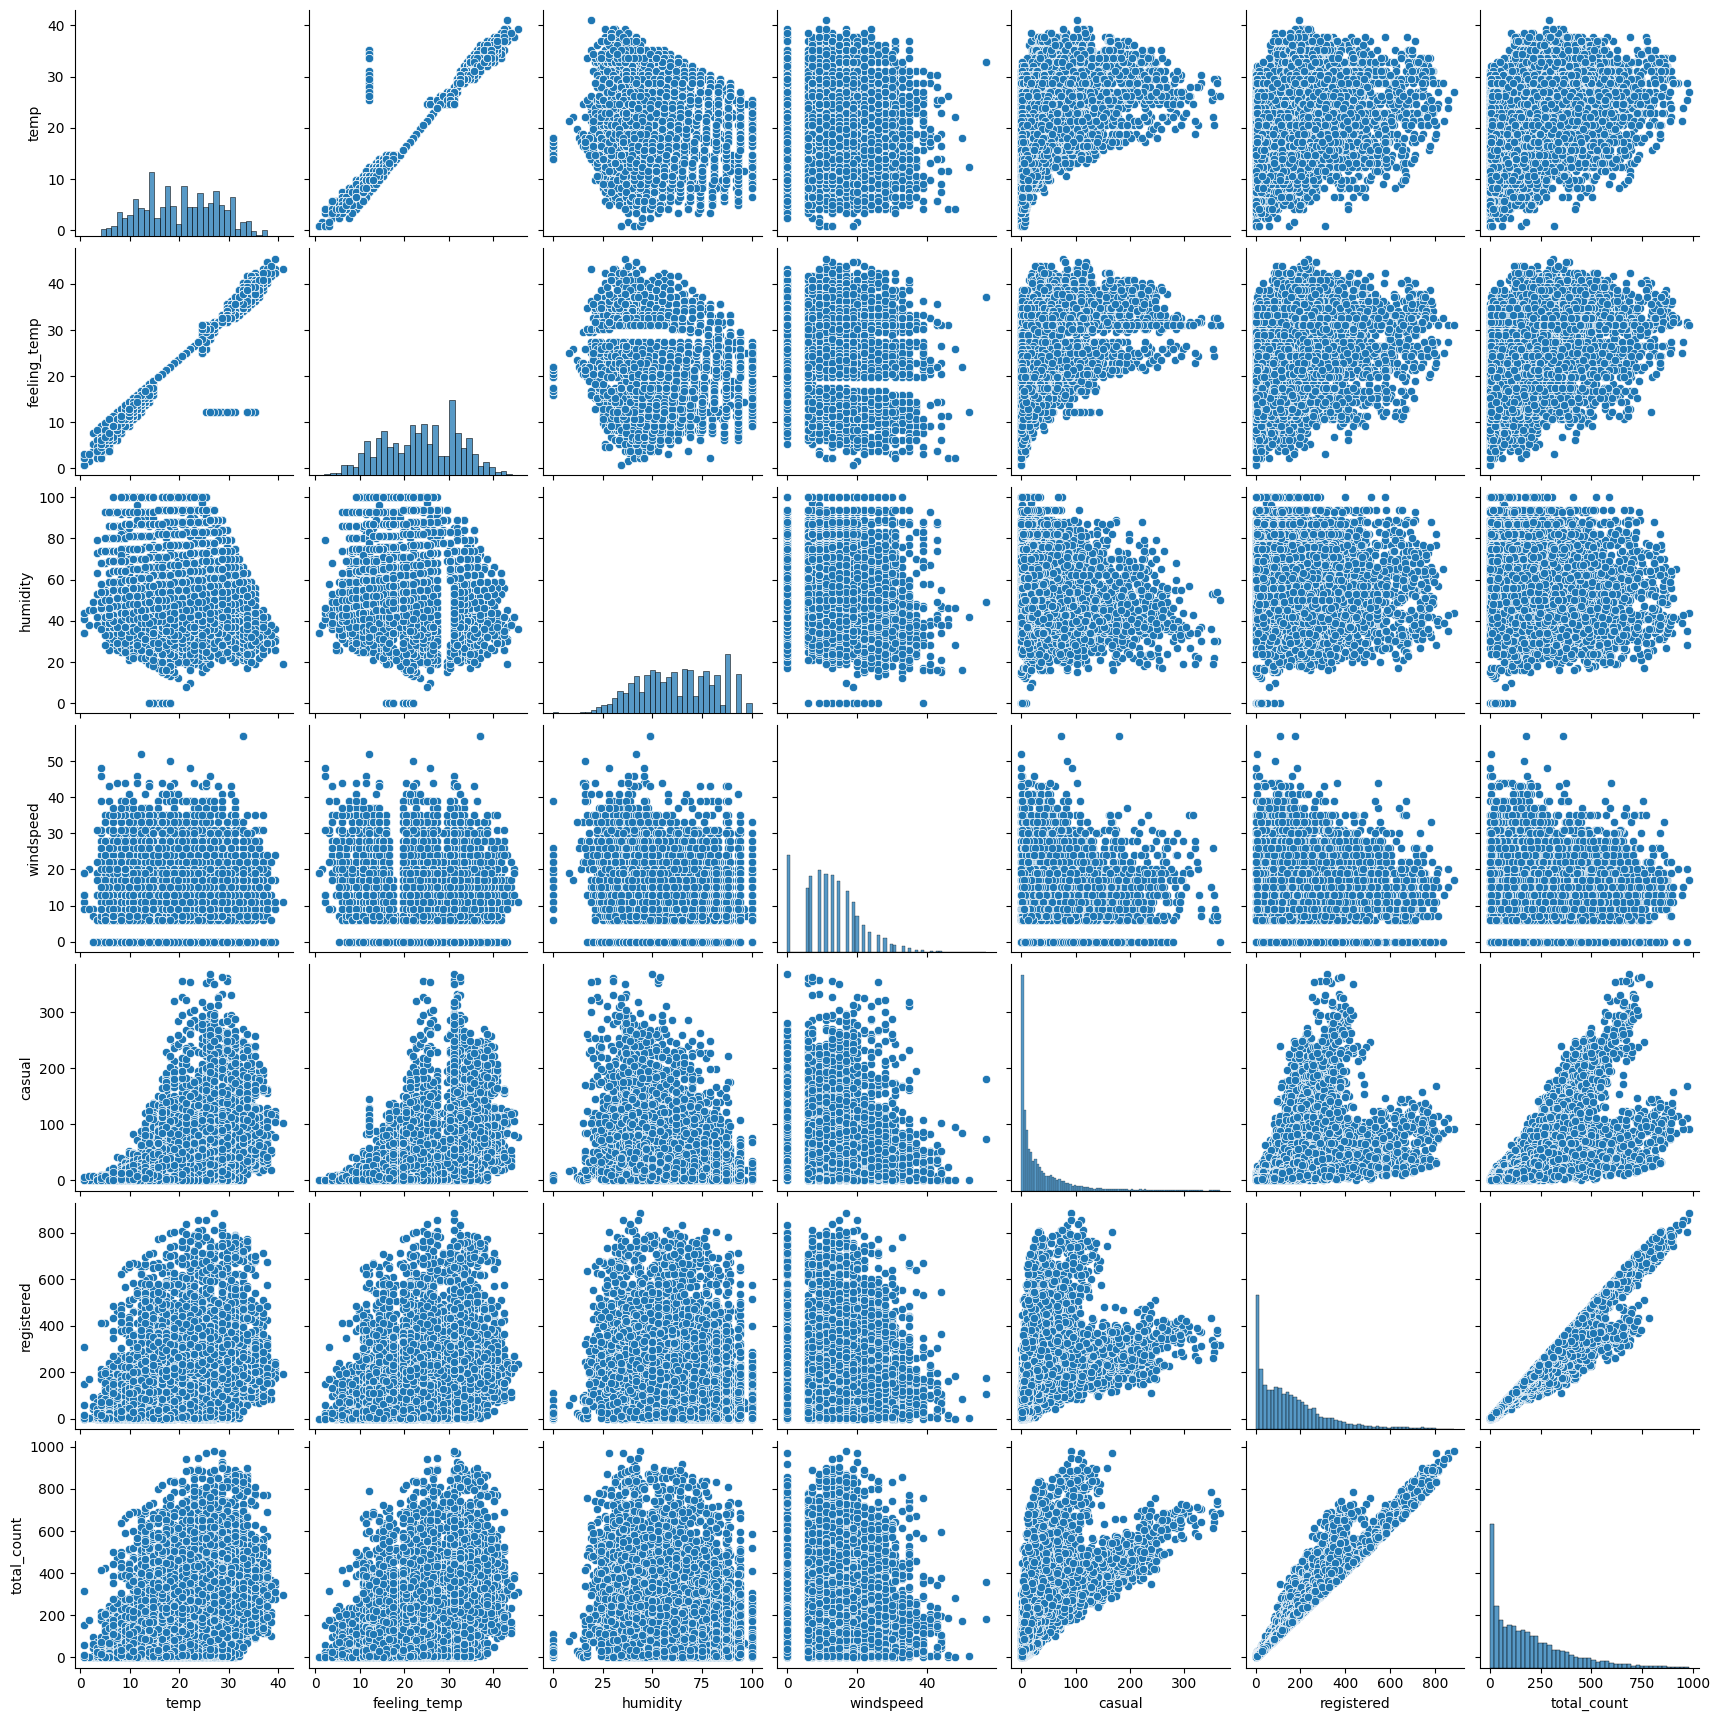

In [ ]:
sns.pairplot(data)


* Very good Correlation between Temp & feeling_Temp [0.98]
* Very good correlation observed between Registered & total_count [0.97]
* As total_count increase, the distribution range of casual increase [0.69]
* Casual user count has good correation with temp [0.47]
* Temperature/feeling_temp have some what correlation with Registered[0.32] & total_count[0.39]
* Humidity has some what correlation with Casual[-0.35] & total_count[-0.32]

# **UniVariate, Bivariate Analysis Set up**

* Lets define all the Uerdefined functions for doing Bivariate analysis in this section

We will create user defined function to get BIvariate plots : "bivariateplot(info,cat,num)"
* info --> Dataframe
* cat --> any category column header
* num --> any numerical column header

In [ ]:
def bivariateplot(info,cat,num):
   plt.figure(figsize = (18,6))
   plt.subplot(1,4,1)
   plt.title("Mean Count value")
   sns.barplot(data=info,y=num,x = cat, estimator = "mean")
   plt.subplot(1,2,2)
   plt.title("Count Density")
   sns.kdeplot(data=info,x=num,hue = cat)
   plt.subplot(1,4,2)
   plt.title("Count box plot")
   sns.boxplot(data=info,y=num,x = cat)
   plt.show()

we will create another user defined function to get all statistical paramters of bivariate Boxplot
* cat --> any category column
* num --> any numerical column

In [ ]:
def bivariateboxplotparameter(cat,num):
  A = data.groupby(cat)[num].describe()
  A["upper_Limit"] = (data.groupby(cat)[num].quantile(0.75)-data.groupby(cat)[num].quantile(0.25))*1.5+data.groupby(cat)[num].quantile(0.75)
  return A

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'feeling_temp', 'humidity', 'windspeed', 'casual', 'registered',
       'total_count'],
      dtype='object')

# **Hypothesis Testing Set up**

In this section let us fix the Confidence level & Level of Signification for all our Hypothesis testing.

As this is with respect to predicting demand Situation
* let us Assume **we want 95% Confidence to reject Null Hypothesi**s
* so for every Hypothesis testing, **Level of Significane will be "0.05 "**

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'feeling_temp', 'humidity', 'windspeed', 'casual', 'registered',
       'total_count'],
      dtype='object')

# **Impact of Season on User Count**



## Season

1: spring, 2: summer, 3: fall, 4: winter

### Univariate Analysis

In [ ]:
data['season'].value_counts(normalize = True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

## Season & total_count

### Bivariate Analysis

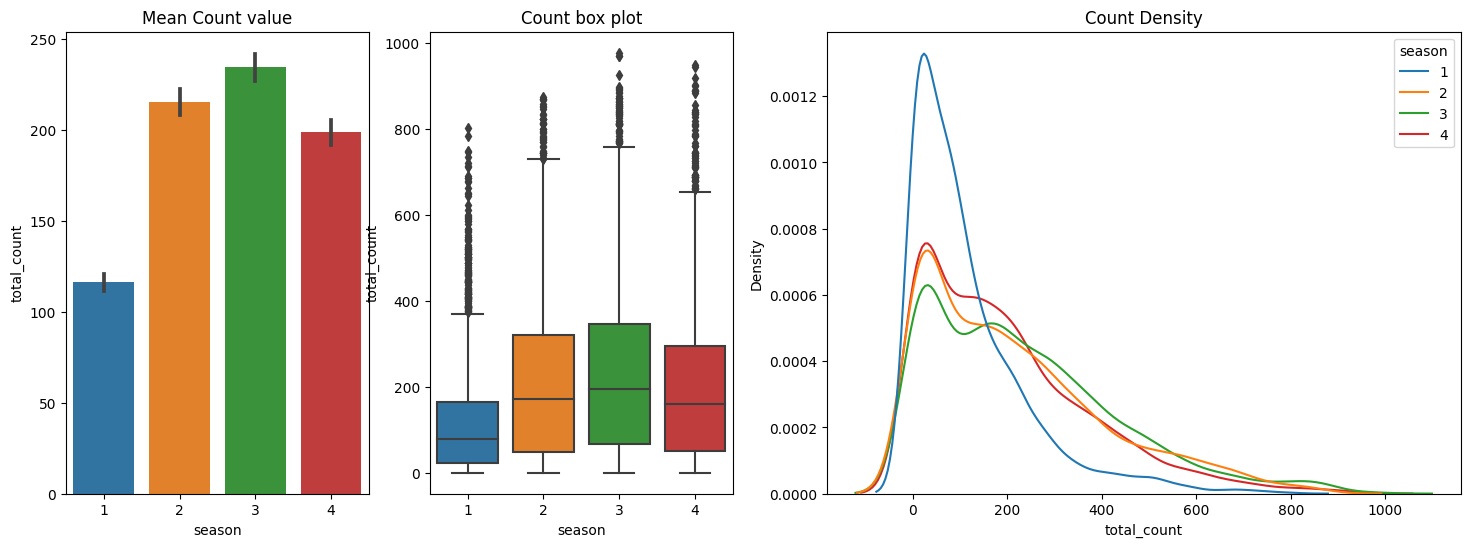

In [ ]:
bivariateplot(info = data,cat ="season",num="total_count")

In [ ]:
bivariateboxplotparameter(cat ="season",num="total_count")

,count,mean,std,min,25%,50%,75%,max,upper_Limit
season,,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0,374.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0,729.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0,765.5
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0,658.5


* No of user total_count in "1:Spring" season are very low with upper limit of 374
* whereas user total_count is highest in "3:fall" are high with upper limit count as 765


Let us do Hypthesis testing to check if Season has effect on Total_Count

### Hypothesis Testing

As we have 4 groups in seasons Category --> we will use ANNOVA & check how does seasons effect on user count

* Ho --> All seasons have same user count mean
* Ha --> Some seasons user count Mean are different

Before using ANNOVA, we will check if all 4 season category data is following Normal Distribution & does they have equal variance

* For Normal Distribution, we will use Shapiro test with below Hypothesis Condition
** H0 : Data is Gaussian
** Ha : Data is not Gaussian

* For Equal Variances Check, we will use Levene Test with below Hypothesis condition
** H0: Variances are equal
** Ha: Variances are not equal




In [ ]:
season1 = data[data["season"]==1]["total_count"]
season2 = data[data["season"]==2]["total_count"]
season3 = data[data["season"]==3]["total_count"]
season4 = data[data["season"]==4]["total_count"]

let's check for Normal Distribution of all four season data sets

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in [season1,season2,season3,season4]:
  test_stat, p_value = shapiro(i)
  if p_value < 0.05:
       print("Reject H0")
       print("Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print("Data is Gaussian")

Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian


* All 4 Season Data sets are not following Normal Distribution
* Once will check Histogram plot

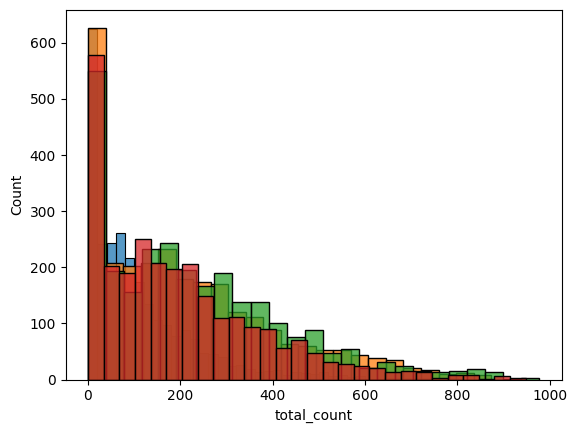

In [ ]:
for i in [season1,season2,season3,season4]:
  sns.histplot(i)

* Even the Histogram shows that they are not following Normal Distribution,kind of following power-law distribution
* Let's do QQ Plot also

<Figure size 300x200 with 0 Axes>

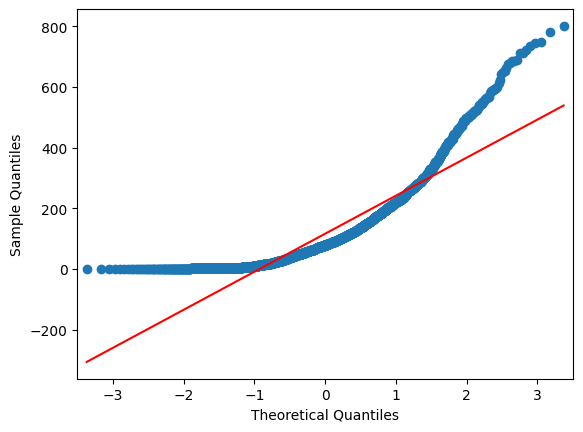

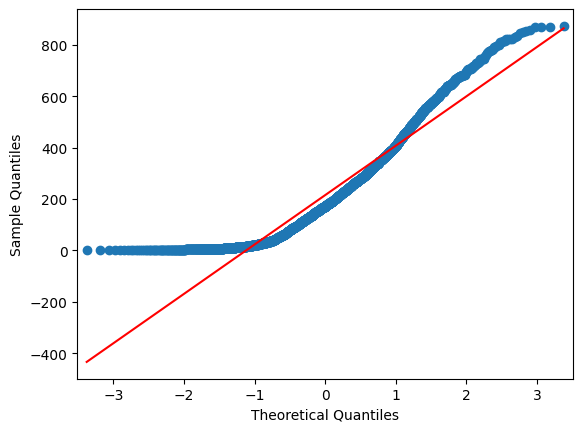

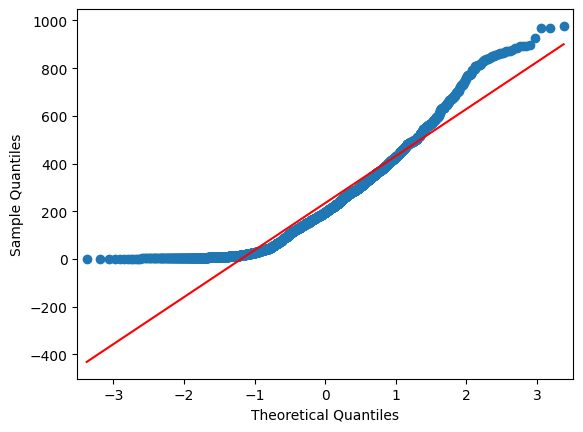

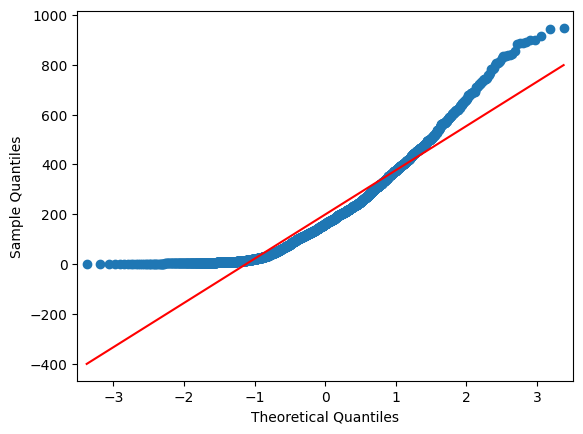

In [ ]:
plt.figure(figsize = (3,2))
for i in [season1,season2,season3,season4]:
   qqplot(i, line="s")

* From Shapiro, Histogram & QQ plot--> we can conclude that 4 season data sets are not following Normal Distribution
* Now we will do Levene test to check for equal Variances

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

1.0147116860043298e-118
Reject Ho
Variances are not equal


* All four Seaons Datasets do not have equal Variance
* So 2 of 3 ANNOVA assumption fails, we will do kruskal Wallis test

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

2.479008372608633e-151
Reject H0
One or more groups have different mean


lets once check what might ANNOVA test give as result

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

f_stats, p_value = f_oneway(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

6.164843386499654e-149
Reject H0
One or more groups have different mean


Both ANNOVA & Kriskal Wallis test state the Seasons has Impact on the total_user count

With >95% confidence we can say that **Season has impact on total_user Count**

## Season & registered

### Bivariate Analysis

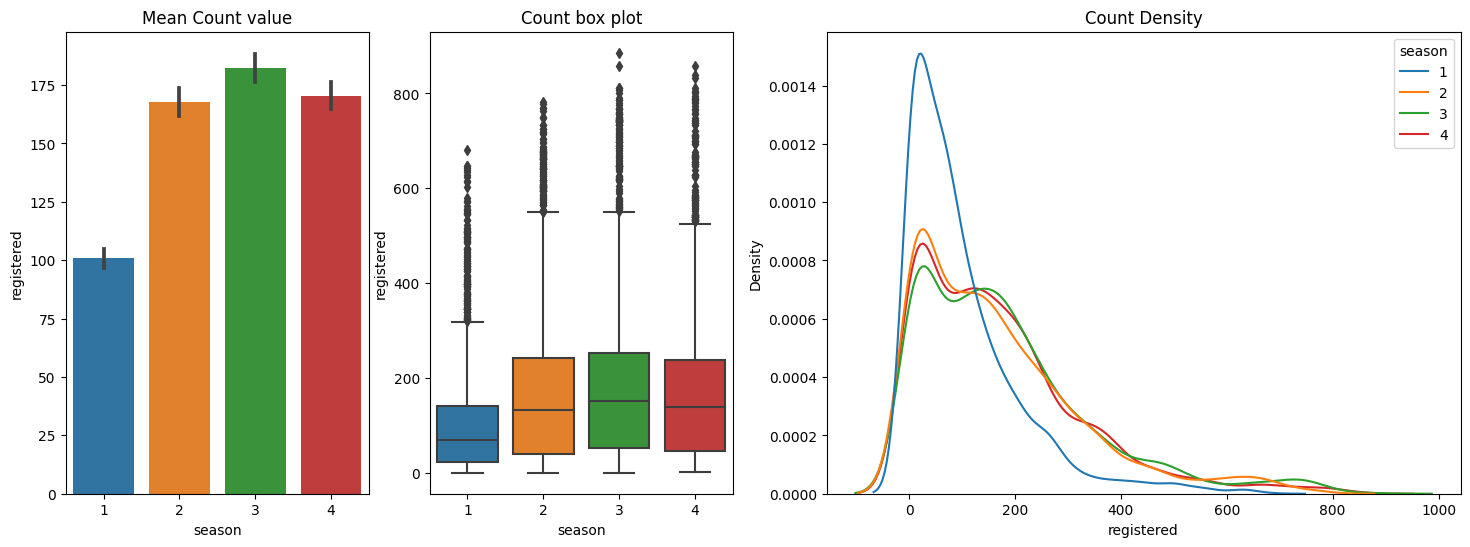

In [ ]:
bivariateplot(info = data,cat ="season",num="registered")

In [ ]:
bivariateboxplotparameter(cat ="season",num="registered")

,count,mean,std,min,25%,50%,75%,max,upper_Limit
season,,,,,,,,,
1,2686.0,100.853686,108.082025,0.0,22.0,69.0,141.00,681.0,319.500
2,2733.0,167.804610,156.156658,0.0,39.0,133.0,243.00,782.0,549.000
3,2733.0,182.196853,164.386982,0.0,53.0,151.0,252.00,886.0,550.500
4,2734.0,170.407462,154.828357,1.0,46.0,139.0,238.75,857.0,527.875


Let us do Hypthesis testing to check if Season has effect on Registered

### Hypthesis Testing

* As Bivariate "Count Density" plots are almost Similar to Total_count,they also do not follow Normal Distribution
* So we will straight away do Kruskalwallis test

In [ ]:
season1 = data[data["season"]==1]["registered"]
season2 = data[data["season"]==2]["registered"]
season3 = data[data["season"]==3]["registered"]
season4 = data[data["season"]==4]["registered"]

#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

2.3698212326776174e-117
Reject H0
One or more groups have different mean


with >95% confidence we can say that **season has impact on registered user Count also**

## Season & casual

### Bivariate Analysis

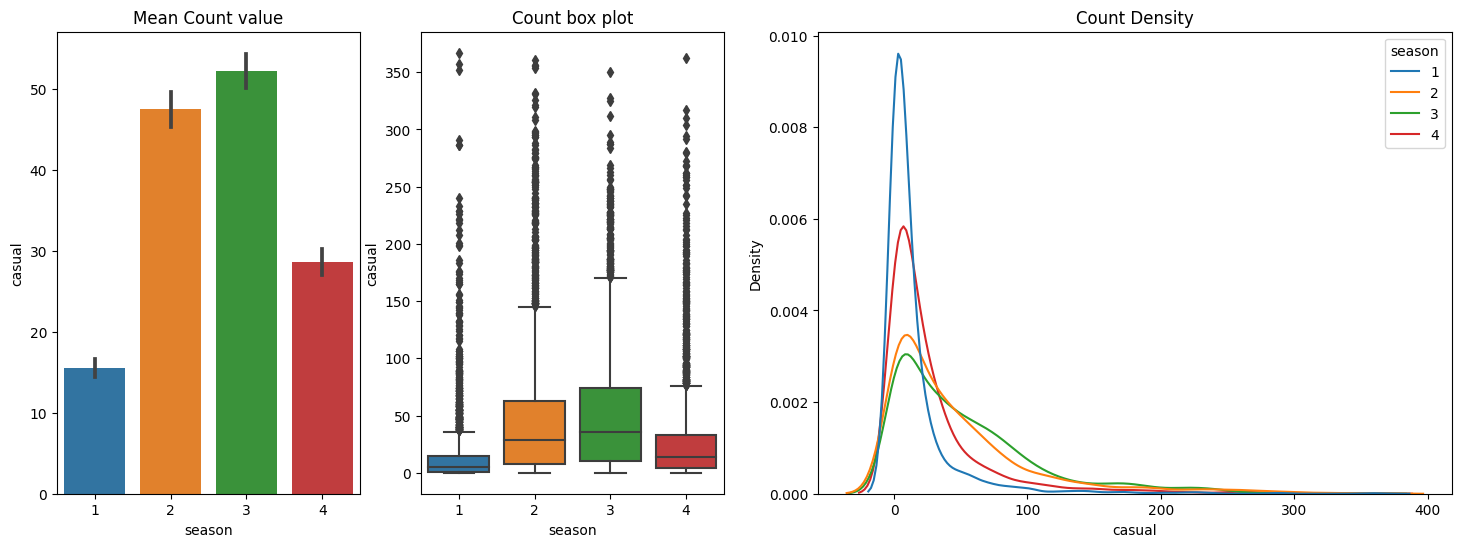

In [ ]:
bivariateplot(info = data,cat ="season",num="casual")

In [ ]:
bivariateboxplotparameter(cat ="season",num="casual")

,count,mean,std,min,25%,50%,75%,max,upper_Limit
season,,,,,,,,,
1,2686.0,15.489576,31.222498,0.0,1.0,5.0,15.0,367.0,36.0
2,2733.0,47.446762,57.649556,0.0,8.0,29.0,63.0,361.0,145.5
3,2733.0,52.220271,54.638059,0.0,10.0,36.0,74.0,350.0,170.0
4,2734.0,28.580834,42.596214,0.0,4.0,14.0,33.0,362.0,76.5


Let us do Hypthesis testing to check if Season has effect on Casual

### Hypothesis Testing

* As seen Bivariate "Count Density" plots are almost Similar to Total_count, they also do not follow Normal Distribution
* So we will straight away do Kruskalwallis test

In [ ]:
season1 = data[data["season"]==1]["casual"]
season2 = data[data["season"]==2]["casual"]
season3 = data[data["season"]==3]["casual"]
season4 = data[data["season"]==4]["casual"]

#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.0
Reject H0
One or more groups have different mean


with >95% confidence we can say that **Season has impact on Casual user Count also**

# **Feature Engineering**

* In this Section we will try solution through different approach i.e., feature Engineering
* I will use "Label Endoder" & "Target encoder with Total_count as Target" to convert all the Categorical data to Numerical
* Then i will use Correlation values to find the most Signification Feature to predict User_count on a given day

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  category      
 2   holiday       10886 non-null  category      
 3   workingday    10886 non-null  category      
 4   weather       10886 non-null  category      
 5   temp          10886 non-null  float64       
 6   feeling_temp  10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_count   10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 808.6 KB


* Creating as TargetEncoder Object

In [ ]:
te=TargetEncoder()

## Season : Category --> Numerical

In [ ]:
data["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
data["season"]=te.fit_transform(data["season"],data["total_count"])
data["season"].value_counts()

198.988296    2734
215.251372    2733
234.417124    2733
116.343261    2686
Name: season, dtype: int64

## Weather : Category --> Numerical

In [ ]:
data["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
data["weather"]=te.fit_transform(data["weather"],data["total_count"])
data["weather"].value_counts()

205.236791    7192
178.955540    2834
118.846333     859
187.986504       1
Name: weather, dtype: int64

* Both Weather & Season have been changed from Categorical to Numerical by targetEncoding woth target as Total_count

* Both Holiday & Workingday are already label Encoded

In [ ]:
le=LabelEncoder()

In [ ]:
data["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
data["holiday"]=le.fit_transform(data["holiday"])
data["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
data["workingday"]=le.fit_transform(data["workingday"])
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
data["workingday"]=te.fit_transform(data["workingday"],data["total_count"])
data["workingday"].value_counts()

193.011873    7412
188.506621    3474
Name: workingday, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  float64       
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  float64       
 5   temp          10886 non-null  float64       
 6   feeling_temp  10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_count   10886 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 1020.7 KB


* All feature have been converted to Numerical except for datetime
* lets drop that datetime feature

In [ ]:
data.drop("datetime",axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        10886 non-null  float64
 1   holiday       10886 non-null  int64  
 2   workingday    10886 non-null  int64  
 3   weather       10886 non-null  float64
 4   temp          10886 non-null  float64
 5   feeling_temp  10886 non-null  float64
 6   humidity      10886 non-null  int64  
 7   windspeed     10886 non-null  float64
 8   casual        10886 non-null  int64  
 9   registered    10886 non-null  int64  
 10  total_count   10886 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 935.6 KB


* Now Lets find he Correlation Value and find the most signification feature to predict total_count

In [ ]:
data.corr()

,season,holiday,workingday,weather,temp,feeling_temp,humidity,windspeed,casual,registered,total_count
season,1.000000,0.007620,0.000136,0.014393,0.697446,0.692124,0.150192,-0.126915,0.271964,0.207020,0.247623
holiday,0.007620,1.000000,-0.250491,0.012219,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,0.000136,-0.250491,1.000000,-0.037005,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.014393,0.012219,-0.037005,1.000000,0.047353,0.049666,-0.392010,-0.022443,0.134838,0.115154,0.133205
temp,0.697446,0.000295,0.029966,0.047353,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
feeling_temp,0.692124,-0.005215,0.024660,0.049666,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.150192,0.001929,-0.010880,-0.392010,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.126915,0.008409,0.013373,-0.022443,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.271964,0.043799,-0.319111,0.134838,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.207020,-0.020956,0.119460,0.115154,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

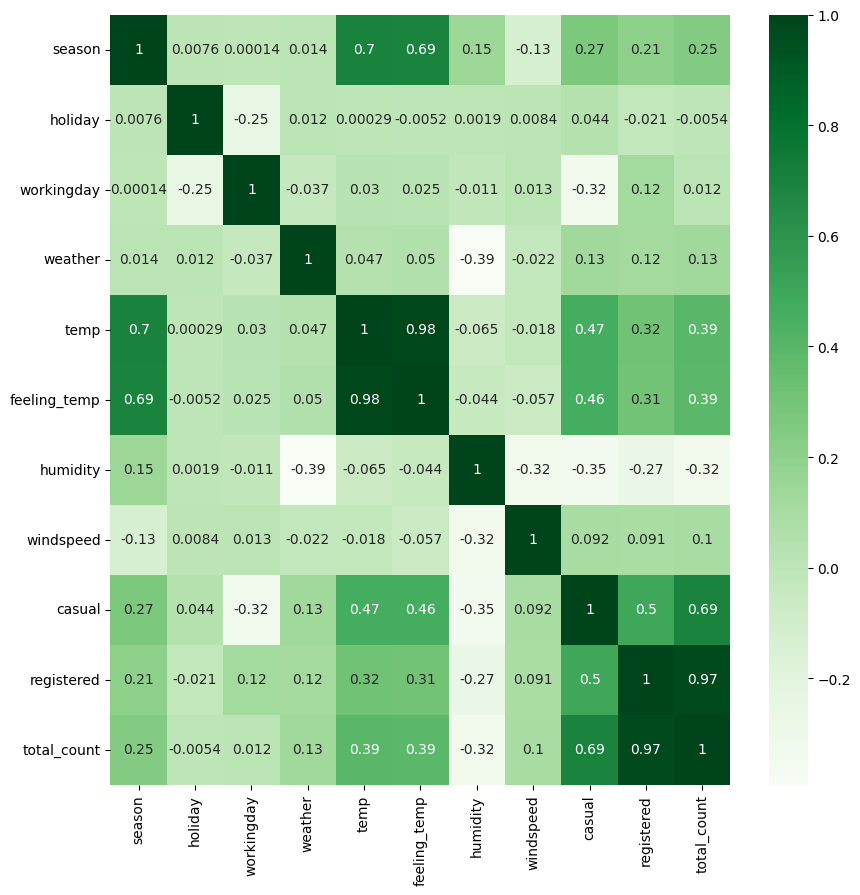

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap = "Greens")


Simialr to what we have conclude in Hypothesis Testing for Total_count, Correlation matrix values are also Giving same output
* Holiday & working daya has no impact on Total_count
* Season & Weather have impact on Total_count
* temp & feeling_temp are positively correlated on Total_count
* Humidity is negatively correlated on Total_count
* Windspeed has very less Positive Correlation on Total_count

As we Target encoded feature w.r.t Total_count, the above correlation matrix is giving correct correlation values for total_count only

# **Bussiness Insights**

## Overall Summary:
* total_count of user per day range between 0 to 647, however there are some unsual booking some days ranging from 648 to 977 per day
* registered user per day range between 0 to 501, however there are some unsual booking some days ranging from 502 to 886 per day
* casual user per day range between 0 to 116, however there are some unsual booking some days ranging from 117 to 367 per day


## Datetime

* User count is maximum in the month of 5~10
* with Hypothesis testing we concluded that Months from Datetime and Season are dependent on each other

## Seasons
* No of user total_count in "1:Spring" season are very low with upper limit of 374 & Average Total_count of 116
* whereas user total_count is highest in "3:fall" are high with upper limit count as 765 & Average Total_count of 234
* **With >95% Confidence we can say that Total_count, Registered & Casual User count are impacted by Seasons**

## Weather
* No of user total_count reduced as the weather became severe
* No of user total_count in Weather:1 is high with upper limit of 690 & Average  of 205
* No of user total_count in Weather:3 is low with upper limit of 368 & Average of 118
* There was only one booking for weather:4 with 164 users[registered : 158 & casual:6]
* **With >95% Confidence we can say that Total_count, Registered & Casual User count are impacted by Weather**

## Weather & Season
* User count High user count in Weather1[Clear, Few clouds] & Season3[Fall] & Least user count in Weather4[Thuderstorm ,Snow] & Season1[Spring]
* **with >95% Confidence we can conclude that Weather & Seasons are Dependent**

## Holiday
* Mean of Total_Count reduced on a holiday compared to Non-Holiday, However in Contradiction **Hypothesis testing proved with 95% confidence that Holiday day/Non Holiday day has no impact on Total_user count mean**
* Mean of Registered user reduced on a holiday compared to Non-Holiday & to Affirm **Hypothesis testing proved with 95% confidence that Holiday day/Non Holiday day has impact on  Registered count**
* No of user Casual increase on a holiday compared to Non-Holiday & to affirm **Hypothesis testing proved with 95% confidence that  Casual user count is higher on Holiday compared to Non Holiday**

## Workingday

* Total_count Mean of Working day & Non Workingday has not much diffeence and to affirm that **Hypothesis testing proved with 95% confidence that Workingday/Non Workingday has no impact on Total_user count mean**
* Registered user counts is higher on a working day compared to Non working day and to affirm **Hypothesis testing proved with >95% confidence that registered user count is higher on Working day compared to Nonworking day**
* Casual user count is higher on a non working day compared to working day and to affirm **Hypothesis testing proved with >95% confidence that Casual user count is higher on Nonworking day compared to Working day**

## Temp & Feeling_Temp
* Hypotheis testing proved with >95% that there is Strong Correlation between Temp & Feeling_temp [Pearson Coefficienct : 0.98]
* Total users Avg count increased as the temperature increased till 36 deg Celsius & then count dropped
* To affirm **Hypothesis testing proved with >95% Confidence that Temp has good positive correlation with Total_users, Regisetered & Casual User Count**


## Humidity
* Avg Users count peaked in the humidity range of 20-22 & then grdually dropped
* To affirm **Hypothesis testing proved with >95% Confidence that Humidity has good negative correlation with Total_users, Registered & Casual User Count**

## Windspeed
* Mostly wind are in the range 8 ~ 24 & Avg Users count peaked in the Windspeed range of 20-35
* To affirm **Hypothesis testing proved with >95% Confidence that Windspeed has very less positive correlation with Total_users, Registered & Casual User Count**


# **Recommendations**

* Maximum usage is found in the Fall Season, its Better to avoid Possible Maintenence activity during that season & Keep More Electric bikes ready to use
* Simialrily as Usage is less in Spring season, All Possible Maintenence to be done in  fall season

* In weather3,4, user count is very less due to harsh weather conditions, Yulu can modify the design to instantly install sepal shield(motorcycle shield that protects riders from harsh weather conditions) to make it viable to use in harsh weather conditions also, so its can retain customer base even in harsh weather conditions

* Casual User increase on Holiday & Non working day, Yulu can better prepare its logistics to cater those unplanned Casual users & convert them to regular customers with some additional feel good service

* Temperature play quite some role for user to use Yulu, when temperature is in the range 0 ~ 20, yulu can provide additional comfort mechanism[low cost handle heaters] to increase user count
